In [180]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.linear_model
import seaborn as sb
import statsmodels.api as sm
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


In [215]:
#Read file
search = pd.read_csv('Search data.csv')
display = pd.read_csv('display data.csv')
video = pd.read_csv('video data.csv')

In [222]:
def ExploratoryAnalysis(data):
    print "first 5 rows: \n" + str(data.head(5)) + "\n\n"
    print "statistical summary of data: \n\n" + str(data.describe()) + "\n\n"
    print "correlation: \n\n" + str(data.corr()) +"\n\n"
    columns = data.columns
    for i in range(0,len(columns)):
        print "columns " + str(columns[i]) + " has distinct values: \n" + str((data[columns[i]].value_counts())) + "\n\n"
    
    print "Pivot table: \n" +    str(pd.pivot_table(data, index = 'Month', aggfunc = np.sum)) + '\n\n'
    print "Graph: number of clicks distributed by Month \n" +  str(sb.factorplot( x='Month', y='Clicks', data=data, kind='bar', estimator = sum)) + "\n\n"
    print "Graph: spend distributed by Month \n" +  str(sb.factorplot( x='Month', y='Cost', data=data, kind='bar', estimator = sum)) + "\n\n"

first 5 rows: 
       Date  Month   Device Channel Campaign Type Media Type  Region  \
0  1/1/2013      1  Desktop  Google        Legacy     Search  Global   
1  1/1/2013      1   Mobile  Google        Legacy     Search   LATAM   
2  1/1/2013      1   Tablet  Google        Legacy     Search     AMS   
3  1/1/2013      1   Tablet  Google        Legacy     Search  Global   
4  1/2/2013      1   Mobile  Google        Legacy     Search    EMEA   

  Targeting   Cost  Clicks  
0     Brand  90.64      62  
1        NB   7.20       4  
2        NB  86.32      28  
3     Brand   9.26       6  
4        NB   1.90       6  


statistical summary of data: 

              Month          Cost        Clicks
count  49835.000000  49835.000000  49835.000000
mean       6.786134    744.762220    119.749253
std        3.442085   1888.371941    387.852678
min        1.000000      0.000000      2.000000
25%        4.000000     15.660000      6.000000
50%        7.000000     77.940000     20.000000
75%      

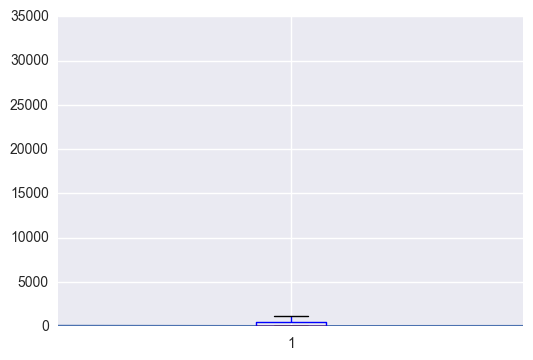

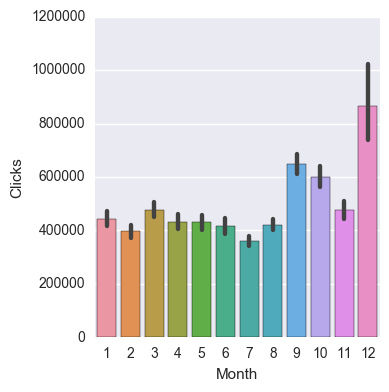

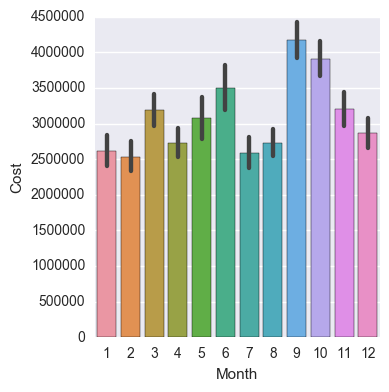

In [223]:

ExploratoryAnalysis(search)

In [186]:
# def createDummiesVariables(data):    
#     data = data.join(pd.get_dummies(data['Device'],prefix="Device"))
#     data = data.join(pd.get_dummies(data['Targeting'],prefix="Targeting"))
#     data = data.join(pd.get_dummies(data['Region'],prefix="Region"))
#     data = data.join(pd.get_dummies(data['Channel'],prefix="Channel"))
#     data = data.join(pd.get_dummies(data['Campaign Type'],prefix="Campaign Type"))
#     data = data.join(pd.get_dummies(data['Month'],prefix="Month"))  
#     return data

In [187]:
    display = display.join(pd.get_dummies(display['Device'],prefix="Device"))
    display = display.join(pd.get_dummies(display['Targeting'],prefix="Targeting"))
    display = display.join(pd.get_dummies(display['Region'],prefix="Region"))
    display = display.join(pd.get_dummies(display['Channel'],prefix="Channel"))
    display = display.join(pd.get_dummies(display['Campaign Type'],prefix="Campaign Type"))
    display = display.join(pd.get_dummies(display['Month'],prefix="Month"))

In [188]:
    video = video.join(pd.get_dummies(video['Device'],prefix="Device"))
    video = video.join(pd.get_dummies(video['Targeting'],prefix="Targeting"))
    video = video.join(pd.get_dummies(video['Region'],prefix="Region"))
    video = video.join(pd.get_dummies(video['Channel'],prefix="Channel"))
    video = video.join(pd.get_dummies(video['Campaign Type'],prefix="Campaign Type"))
    video = video.join(pd.get_dummies(video['Month'],prefix="Month"))

In [189]:
    search = search.join(pd.get_dummies(search['Device'],prefix="Device"))
    search = search.join(pd.get_dummies(search['Targeting'],prefix="Targeting"))
    search = search.join(pd.get_dummies(search['Region'],prefix="Region"))
    search = search.join(pd.get_dummies(search['Channel'],prefix="Channel"))
    search = search.join(pd.get_dummies(search['Campaign Type'],prefix="Campaign Type"))
    search = search.join(pd.get_dummies(search['Month'],prefix="Month"))

In [201]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

def RandomForrest(data):
#     data['Cost'] = np.log(data["Cost"])
    X = data.drop(['Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    y = data["Clicks"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
#     data['predict_clicks'] = rf.predict(X_test)
    print 'MSE: ' + str(metrics.mean_squared_error(y_test,rf.predict(X_test)))
    print 'accuracy = ' + str(rf.score(X_test,y_test))    
    feature_importances_array = rf.feature_importances_

    # Put the features themselves in a list
    features_array = X.columns.values 

    # Turn these into a Data Frame
    feature_importances_df = pd.DataFrame({'importances' : feature_importances_array, 'features' : features_array})
    
#     print feature_importances_df.sort(columns='importances', ascending=False)
    return rf

In [210]:
def RF_predict(data):
    rf = RandomForrest(data)
    X = data.drop(['Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    test_data = X[X['Month_12'] == 1]
    test_data['predicted_clicks'] = rf.predict(test_data)
    print 'actual CPC: ' + str(data[data['Month'] == 12]['Cost'].sum()/data[data['Month'] == 12]['Clicks'].sum())
    print 'predict CPC: ' + str(test_data['Cost'].sum()/test_data['predicted_clicks'].sum())

In [213]:
RF_predict(display)

MSE: 870088.442973
accuracy = 0.989511737232
actual CPC: 0.145915385398
predict CPC: 0.146086207221


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [205]:
RF_predict(video)

MSE: 1923.45998734
accuracy = 0.943244058053
actual CPC: 3.65036467236
predict CPC: 3.35898471089


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [206]:
RF_predict(search)

MSE: 36628.834042
accuracy = 0.783625259987
actual CPC: 3.31646463174
predict CPC: 3.45250744706


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
